In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pickle
from keras.utils.np_utils import to_categorical   
import itertools
import operator
# Display plots inline and change default figure size
%matplotlib inline

In [2]:
def hyperparameter_tuning(network_type, X, y, threshold, max_iter, alpha,nodes=False):
  best_params = {}
  if network_type == 'LR':
    for i in itertools.product(max_iter,alpha):
      w,b = logisticRegression_NN(X, y,i[0],i[1],threshold)
      y_pred = np.round(predict(w, b, X))
      acc = round(accuracy_score(y,y_pred)*100,2)
      best_params[i] = acc
    return max(best_params.items(), key=operator.itemgetter(1))[0]
  elif network_type == 'Shallow_NN':
    for i in itertools.product(nodes,max_iter,alpha):
      vals = NN(X, y,i[0],i[1],i[2], threshold = 1e-6)
      y_pred = np.round(predict_NN(vals, X))
      acc = round(accuracy_score(y,y_pred)*100,2)
      best_params[i] = acc
    return max(best_params.items(), key=operator.itemgetter(1))[0]
  else:
    print("Invalid Choice...")
    return None

# Part 1

In [3]:
#Sigmoid function
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))            # Function to map the predicted values to probabilites

def costFunc(y,yhat): # Cost Function to minimize the error(absolute difference between y_actual and y_predicted)
        return -1*(y*(np.log(yhat)) + (1 - y)*(np.log(1 - yhat)))
    
def logisticRegression_NN(X, y,max_iterations,alpha,threshold):
    convergence = False
    n = X.shape[1]
    m = X.shape[0]
    w = np.random.uniform(0,0.01,n)
    b = np.random.rand()
    previous_cost = sys.maxsize
    for i in range(max_iterations):
        idx = np.random.randint(m)
        xj = X[idx]
        yj = y[idx]
        
        #Forward Propogation Stage
        z = np.dot(xj,w)+b
        yhat = sigmoid(z)
        current_cost = costFunc(yj,yhat)
        if abs(previous_cost-current_cost) < threshold:
            convergence = True
            break
        previous_cost = current_cost
        
        # Gradient Descent Stage
        delta_w = [None] * n
        for k in range(n):
            delta_w[k] = (yhat-yj)*xj[k]
        delta_b = yhat-yj
        for l in range(n):
            w[l] -= alpha*delta_w[l]
        b -= alpha*delta_b
    
    return w,b

# Part 2

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/DL_Assignment1/


/content/drive/MyDrive/DL_Assignment1


In [6]:
#Reading both the datasets
df_moon = pd.read_csv("moons400.csv")
df_blob = pd.read_csv("blobs250.csv")

# splitting both dataset into X features and y class

y_moon = df_moon['Class'].values
y_blob = df_blob['Class'].values

del df_moon['Class']
del df_blob['Class']

X_moon = df_moon.values
X_blob = df_blob.values

X_moon = preprocessing.StandardScaler().fit_transform(X_moon)
X_blob = preprocessing.StandardScaler().fit_transform(X_blob)

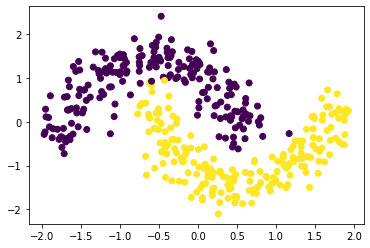

In [7]:
# moon dataset -------- non - linear
plt.scatter(X_moon[:,0], X_moon[:,1], c=y_moon)  


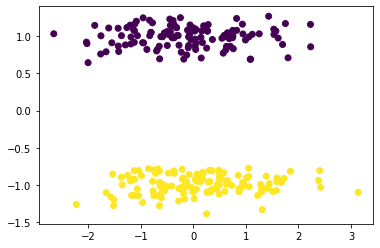

In [8]:

# blob dataset --------- linear
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob) 

In [9]:
def predict(w,b, X):
    z = np.dot(X,w)+b
    yhat = sigmoid(z)   
    
    for a in range(X.shape[0]):
        if yhat[a] <0.5:
            yhat[a] = 0
        else:
            yhat[a] = 1
    
    return yhat

In [10]:
# Splitting datasets into train, validation and test
np.random.seed(30)

X_train_moon, X_test_moon, y_train_moon, y_test_moon =     \
            train_test_split(X_moon, y_moon, test_size=0.30, random_state=42)

X_val_moon, X_test_moon, y_val_moon, y_test_moon =    \
            train_test_split(X_test_moon, y_test_moon, test_size=0.50, random_state=42)


X_train_blob, X_test_blob, y_train_blob, y_test_blob =    \
            train_test_split(X_blob, y_blob, test_size=0.30, random_state=42)

X_val_blob, X_test_blob, y_val_blob, y_test_blob = \
            train_test_split(X_test_blob, y_test_blob, test_size=0.50, random_state=42)

In [11]:
# #Parameter Tuning
# alpha = [*np.arange(0.001, 0.02, 0.001)]
# max_iterations = [*range(500, 20000, 500)]
threshold = 1e-6
# best_params = hyperparameter_tuning("LR", X_val_moon, y_val_moon, threshold, max_iterations, alpha)
# print(best_params)

In [12]:
#Training both datasets
max_iterations = 500
alpha = 0.006
np.random.seed(30)
moon_weights,moon_bias = logisticRegression_NN(X_train_moon, y_train_moon,max_iterations,alpha,threshold)
blob_weights,blob_bias = logisticRegression_NN(X_train_blob, y_train_blob,max_iterations,alpha,threshold)

In [13]:

#Testing on both validation and testing

# moon training
moon_train_pred = np.round(predict(moon_weights, moon_bias, X_train_moon))
print("Accuracy on moon training set: ", round(accuracy_score(y_train_moon,moon_train_pred)*100,2),"%")

# predict moon validation set and report accuracy
moon_valid_pred = np.round(predict(moon_weights, moon_bias, X_val_moon))
print("Accuracy on moon validation set: ", round(accuracy_score(y_val_moon,moon_valid_pred)*100,2),"%")

# predict moon testing set and report accuracy
moon_test_pred = np.round(predict(moon_weights, moon_bias, X_test_moon))
print("Accuracy on moon testing set: ", round(accuracy_score(y_test_moon,moon_test_pred)*100,2),"%")



# predict blob training set and report accuracy
blob_train_pred = np.round(predict(blob_weights, blob_bias, X_train_blob))
print("\nAccuracy on blob training set: ", round(accuracy_score(y_train_blob,blob_train_pred)*100,2),"%")

# predict blob validation set and report accuracy
blob_valid_pred = np.round(predict(blob_weights, blob_bias, X_val_blob))
print("Accuracy on blob validation set: ", round(accuracy_score(y_val_blob,blob_valid_pred)*100,2),"%")

# predict blob testing set and report accuracy
blob_test_pred = np.round(predict(blob_weights, blob_bias, X_test_blob))
print("Accuracy on blob testing set: ", round(accuracy_score(y_test_blob,blob_test_pred)*100,2),"%")


Accuracy on moon training set:  82.14 %
Accuracy on moon validation set:  90.0 %
Accuracy on moon testing set:  90.0 %

Accuracy on blob training set:  100.0 %
Accuracy on blob validation set:  100.0 %
Accuracy on blob testing set:  100.0 %


# Part 3


### Training NN

https://matrices.io/deep-neural-network-from-scratch/

In [14]:
def sigmoid_NN(z):
    return 1.0 / (1 + np.exp(-z))            # Function to map the predicted values to probabilites


def derivative_sigmoid_NN(inp):
    return inp*(1-inp)

def cost_NN(y,yhat):
    #return np.sum(np.square(yhat - y)) /2
    return -1.0*(y*(np.log(yhat)) + (1 - y)*(np.log(1 - yhat)))
    

In [15]:
#variable number of output nodes

def NN(X, y,hidden_nodes,max_iterations,alpha,threshold):

  input_nodes = X.shape[1]                                        # no. of cols of X
  output_nodes = 1                                                # no. of output nodes 
  
  #initialise weights going from input_nodes into hidden_nodes
  layer_1_weights = np.random.randn(input_nodes,hidden_nodes)*0.001
  
  #initialise weights going from hidden_nodes into output_node 
  layer_2_weights = np.random.randn(hidden_nodes,output_nodes)*0.001
  
  #initialise bias weights going into hidden_nodes  
  layer_1_bias = np.random.randn(hidden_nodes)*0.001
  layer_1_bias = layer_1_bias.reshape(1, hidden_nodes)
  
  #initialise bias weights going into output_node  
  layer_2_bias = np.random.randn(output_nodes)*0.001
  layer_2_bias = layer_2_bias.reshape(1, output_nodes)
  
  previous_cost = sys.maxsize                                     # setting initial cost = random value
  
  # setting while loop initial values 
  i = 0
  convergence = False
  
  while(i in range(max_iterations) and convergence != True):
      
      i+=1
  
      idx = np.random.randint(X.shape[0])                             # select 1 training case at random
      xj = X[idx].reshape(1,input_nodes)
      yj = y[idx]
      
      #forward propogation step
      layer_1_Z = np.dot(xj,layer_1_weights) + layer_1_bias      #layer 1 Z calculation
      layer_1_activation = sigmoid_NN(layer_1_Z)                                  # Activation of layer 1
      
      layer_2_Z = np.dot(layer_1_activation,layer_2_weights) + layer_2_bias  # layer 2 z calculation
      yhat = sigmoid_NN(layer_2_Z)                                                # Activation of layer 2 ~ yhat value
              
      cost = cost_NN(yj, yhat)[0,0]
      
#         if(i%50 == 0):
#             print("Cost for "+str(i)+"th iteration "+str(cost))
          
      if abs(previous_cost - cost) < threshold:                       # Testing for convergence
          # print(convergence)
          convergence = True
      previous_cost = cost                                            # set cost to previous for next iteration 
      
              
      #back propogation step
      # output layer
      layer_2_delta_z = yhat - yj
      layer_2_delta_weight = np.dot(layer_1_activation.T,layer_2_delta_z)
      layer_2_delta_bias = layer_2_delta_z
      
      # hidden layer
      layer_1_delta_z =  np.multiply(np.dot(layer_2_delta_z,layer_2_weights.T),derivative_sigmoid_NN(layer_1_Z))
      layer_1_delta_weight = np.dot(xj.T,layer_1_delta_z)
      layer_1_delta_bias = layer_1_delta_z
      
      #gradient descent update step
      layer_1_weights -= alpha * layer_1_delta_weight
      layer_2_weights -= alpha * layer_2_delta_weight
      
      layer_1_bias -= alpha * layer_1_delta_bias
      layer_2_bias -= alpha * layer_2_delta_bias

  return{ "layer_1_weights": layer_1_weights,
          "layer_2_weights": layer_2_weights,
          "layer_1_bias"   : layer_1_bias,
          "layer_2_bias"   : layer_2_bias
        }

In [16]:
def predict_NN(NN_parameters, X):
    layer_1_Z = np.dot(X,NN_parameters["layer_1_weights"]) + NN_parameters["layer_1_bias"]
    layer_1_activation = sigmoid_NN(layer_1_Z)                                  
        
    layer_2_Z = np.dot(layer_1_activation,NN_parameters["layer_2_weights"]) + NN_parameters["layer_2_bias"]
    yhat = sigmoid_NN(layer_2_Z)
    
    for a in range(X.shape[0]):
        if yhat[a] <0.5:
            yhat[a] = 0
        else:
            yhat[a] = 1
    
    return yhat

### Testing NN


In [17]:
#Reading both the datasets
df_moon = pd.read_csv("moons400.csv")
df_blob = pd.read_csv("blobs250.csv")



In [18]:
# splitting both dataset into X features and y class

y_moon = df_moon['Class'].values
y_blob = df_blob['Class'].values

del df_moon['Class']
del df_blob['Class']

X_moon = df_moon.values
X_blob = df_blob.values

X_moon = preprocessing.StandardScaler().fit_transform(X_moon)
X_blob = preprocessing.StandardScaler().fit_transform(X_blob)


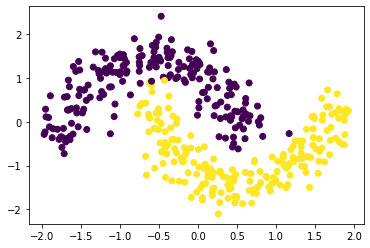

In [19]:
# moon dataset -------- non - linear
plt.scatter(X_moon[:,0], X_moon[:,1], c=y_moon)  

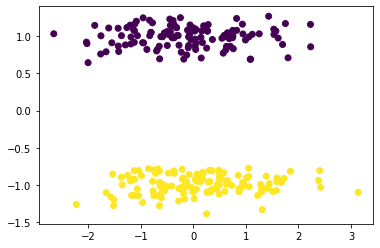

In [20]:
# blob dataset --------- linear
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob) 

In [21]:
np.random.seed(30)

X_train_moon, X_test_moon, y_train_moon, y_test_moon =     \
            train_test_split(X_moon, y_moon, test_size=0.30, random_state=42)

X_val_moon, X_test_moon, y_val_moon, y_test_moon =    \
            train_test_split(X_test_moon, y_test_moon, test_size=0.50, random_state=42)


X_train_blob, X_test_blob, y_train_blob, y_test_blob =    \
            train_test_split(X_blob, y_blob, test_size=0.30, random_state=42)

X_val_blob, X_test_blob, y_val_blob, y_test_blob = \
            train_test_split(X_test_blob, y_test_blob, test_size=0.50, random_state=42)



In [22]:
# #Parameter Tuning
# nodes = [*range(1, 11, 1)]
# max_iterations = [*range(500, 20000, 500)]
# alpha = [*np.arange(0.001, 0.1, 0.001)]
# threshold = 1e-6
# best_params = hyperparameter_tuning("Shallow_NN", X_val_moon, y_val_moon, threshold, max_iterations, alpha,nodes)
# print(best_params)

### training both datasets 

In [23]:
# train moon dataset
# nodes = best_params[0]
# max_iterations = best_params[1]
# alpha = best_params[2]
np.random.seed(30)
moon_NN = NN(X_train_moon, y_train_moon,hidden_nodes = 4,max_iterations = 10000,alpha = 0.08, threshold = 1e-6)
blob_NN = NN(X_train_blob, y_train_blob,hidden_nodes = 6,max_iterations = 10000,alpha = 0.05, threshold = 1e-6)

### Testing accuracy on validation and testing set

In [24]:



# moon training
moon_train_pred = np.round(predict_NN(moon_NN, X_train_moon))
print("Accuracy on moon training set: ", round(accuracy_score(y_train_moon,moon_train_pred)*100,2),"%")

# predict moon validation set and report accuracy
moon_valid_pred = np.round(predict_NN(moon_NN, X_val_moon))
print("Accuracy on moon validation set: ", round(accuracy_score(y_val_moon,moon_valid_pred)*100,2),"%")

# predict moon testing set and report accuracy
moon_test_pred = np.round(predict_NN(moon_NN, X_test_moon))
print("Accuracy on moon testing set: ", round(accuracy_score(y_test_moon,moon_test_pred)*100,2),"%")



# predict blob training set and report accuracy
blob_train_pred = np.round(predict_NN(blob_NN, X_train_blob))
print("\nAccuracy on blob training set: ", round(accuracy_score(y_train_blob,blob_train_pred)*100,2),"%")

# predict blob validation set and report accuracy
blob_valid_pred = np.round(predict_NN(blob_NN, X_val_blob))
print("Accuracy on blob validation set: ", round(accuracy_score(y_val_blob,blob_valid_pred)*100,2),"%")

# predict blob testing set and report accuracy
blob_test_pred = np.round(predict_NN(blob_NN, X_test_blob))
print("Accuracy on blob testing set: ", round(accuracy_score(y_test_blob,blob_test_pred)*100,2),"%")




Accuracy on moon training set:  83.93 %
Accuracy on moon validation set:  90.0 %
Accuracy on moon testing set:  88.33 %

Accuracy on blob training set:  100.0 %
Accuracy on blob validation set:  100.0 %
Accuracy on blob testing set:  100.0 %


# Part 4

In [25]:
# This function taken from the CIFAR website

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [26]:
def loadbatch(batchname):
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch

In [27]:
def loadlabelnames():
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

In [28]:
import matplotlib.pyplot as plt

def visualise(data, index):
    # MM Jan 2019: Given a CIFAR data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (32x32).

    picture = data[index]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    # Note: after reshaping like this, you could select one colour channel or average them.
    picture.shape = (32,32) 
    picture = np.rot90(picture)
    print(picture)
    
    # Plot.imshow requires the RGB to be the third dimension, not the first, so need to rearrange
    # picture = picture.transpose([1, 2, 0])
    plt.imshow(picture)
    plt.show()

In [29]:
batch1 = loadbatch('data_batch_1')
print("Number of items in the batch 1 is", len(batch1))
batch2 = loadbatch('data_batch_2')
print("Number of items in the batch 2 is", len(batch2))

# Display all keys, so we can see the ones we want
print('All keys in the batch 1:', batch1.keys())
print('All keys in the batch 2:', batch2.keys())

Number of items in the batch 1 is 4
Number of items in the batch 2 is 4
All keys in the batch 1: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
All keys in the batch 2: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [30]:
data1 = batch1[b'data'][:,:1024]
data2 = batch2[b'data'][:,:1024]
data = np.vstack([data1, data2]) 
data = data.astype('float32')
data /= 255

labels1 = np.array(batch1[b'labels'])
labels2 = np.array(batch2[b'labels'])
labels = np.append(labels1, labels2)

names = loadlabelnames()

In [31]:
# # Display a few images from the batch
# for i in range (1,2):
#    visualise(data, i)
#    print("Image", i,": Class is ", names[labels[i]])

In [32]:
df = pd.DataFrame(data)
df['Class'] = labels

In [33]:
df['Class'] = df['Class'].astype('int')

df = df.loc[df['Class'].isin([2,3])]

di = {2: 0, 3: 1}

df.replace({"Class": di}, inplace=True)

# splitting both dataset into X features and y class

y = df['Class'].values

del df['Class']

X = df.values

In [34]:
X.shape

(4053, 1024)

In [35]:
np.random.seed(30)

X_train_images, X_test_images, y_train_images, y_test_images =     \
            train_test_split(X, y, test_size=0.30, random_state=42)

X_val_images, X_test_images, y_val_images, y_test_images =    \
            train_test_split(X_test_images, y_test_images, test_size=0.50, random_state=42)



In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
# #Parameter Tuning
# nodes = [*range(1, 2, 1)]
# max_iterations = [*range(500, 2000, 500)]
# alpha = [*np.arange(0.001, 0.003, 0.001)]
# threshold = 1e-6
# best_params = hyperparameter_tuning("Shallow_NN", X_val_images, y_val_images, threshold, max_iterations, alpha,nodes)
# print(best_params)

In [38]:
# train image dataset
np.random.seed(30)
image_NN = NN(X_train_images, y_train_images, hidden_nodes = 100,max_iterations = 150500,alpha = 0.001, threshold = 1e-6)

In [39]:
# Image training
images_train_pred = np.round(predict_NN(image_NN, X_train_images))
print("Accuracy on Image training set: ", round(accuracy_score(y_train_images,images_train_pred)*100,2),"%")

# predict Image validation set and report accuracy
images_valid_pred = np.round(predict_NN(image_NN, X_val_images))
print("Accuracy on Image validation set: ", round(accuracy_score(y_val_images,images_valid_pred)*100,2),"%")

# predict Image testing set and report accuracy
images_test_pred = np.round(predict_NN(image_NN, X_test_images))
print("Accuracy on Image testing set: ", round(accuracy_score(y_test_images,images_test_pred)*100,2),"%")



Accuracy on Image training set:  60.66 %
Accuracy on Image validation set:  58.72 %
Accuracy on Image testing set:  59.05 %


Part 5 - Rishi Enhancement

In [156]:
def augment(data, index,labels):
    # MM Jan 2019: Given a CIFAR data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (32x32).
    augmented_data = []
    augmented_class = []
    picture = data[index]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    # Note: after reshaping like this, you could select one colour channel or average them.
    picture.shape = (32,32) 
    augmented_data.append(np.rot90(picture))
    augmented_class.append(labels[index])
    # print(names[labels[index]])
    augmented_data.append(np.fliplr(picture))
    augmented_class.append(labels[index])
    augmented_data = np.array(augmented_data)
    augmented_data = augmented_data.reshape(2,1024)
    augmented_class = np.array(augmented_class)
    
    return augmented_data,augmented_class

In [157]:
# Display a few images from the batch
for i in range(len(data)):
   augmented_data, augmented_class = augment(X_train_images, i,y_train_images)
   X_train_images = np.vstack ((X_train_images, augmented_data) )
   y_train_images = np.append(y_train_images,augmented_class)

In [178]:
#variable number of output nodes

def enhanced_NN(X, y,hidden_nodes,max_iterations,alpha,threshold,optimizer,decay_rate_1=False,decay_rate_2=False,epsilon = 1e-8):
  try:
    input_nodes = X.shape[1]                                        # no. of cols of X
    output_nodes = 1                                                # no. of output nodes 
    layer_1_velocity_w = 0
    layer_2_velocity_w = 0
    layer_1_acceleration_w = 0
    layer_2_acceleration_w = 0
    layer_1_velocity_b = 0
    layer_2_velocity_b = 0
    layer_1_acceleration_b = 0
    layer_2_acceleration_b = 0
    #initialise weights going from input_nodes into hidden_nodes
    layer_1_weights = np.random.randn(input_nodes,hidden_nodes)*0.001
    
    #initialise weights going from hidden_nodes into output_node 
    layer_2_weights = np.random.randn(hidden_nodes,output_nodes)*0.001
    
    #initialise bias weights going into hidden_nodes  
    layer_1_bias = np.random.randn(hidden_nodes)*0.001
    layer_1_bias = layer_1_bias.reshape(1, hidden_nodes)
    
    #initialise bias weights going into output_node  
    layer_2_bias = np.random.randn(output_nodes)*0.001
    layer_2_bias = layer_2_bias.reshape(1, output_nodes)
    
    previous_cost = sys.maxsize                                     # setting initial cost = random value
    
    # setting while loop initial values 
    i = 0
    time_step = 0
    convergence = False
    
    while(i in range(max_iterations) and convergence != True):
        
        i+=1
    
        idx = np.random.randint(X.shape[0])                             # select 1 training case at random
        xj = X[idx].reshape(1,input_nodes)
        yj = y[idx]
        
        
        #forward propogation step
        layer_1_Z = np.dot(xj,layer_1_weights) + layer_1_bias      #layer 1 Z calculation
        layer_1_activation = sigmoid_NN(layer_1_Z)                                  # Activation of layer 1
        
        layer_2_Z = np.dot(layer_1_activation,layer_2_weights) + layer_2_bias  # layer 2 z calculation
        yhat = sigmoid_NN(layer_2_Z)                                                # Activation of layer 2 ~ yhat value
                
        cost = cost_NN(yj, yhat)[0,0]
        
#         if(i%50 == 0):
#             print("Cost for "+str(i)+"th iteration "+str(cost))
            
        if abs(previous_cost - cost) < threshold:                       # Testing for convergence
            # print(convergence)
            convergence = True
        previous_cost = cost                                            # set cost to previous for next iteration 
        
                
        #back propogation step
        # output layer
        layer_2_delta_z = yhat - yj
        layer_2_delta_weight = np.dot(layer_1_activation.T,layer_2_delta_z)
        layer_2_delta_bias = layer_2_delta_z
        
        # hidden layer
        layer_1_delta_z =  np.multiply(np.dot(layer_2_delta_z,layer_2_weights.T),derivative_sigmoid_NN(layer_1_Z))
        layer_1_delta_weight = np.dot(xj.T,layer_1_delta_z)
        layer_1_delta_bias = layer_1_delta_z
        if optimizer == 'sgd':
          #gradient descent update step
          layer_1_weights -= alpha * layer_1_delta_weight
          layer_2_weights -= alpha * layer_2_delta_weight
          
          layer_1_bias -= alpha * layer_1_delta_bias
          layer_2_bias -= alpha * layer_2_delta_bias

        if optimizer == 'adam':
            # Gradients for each layer
            w2 = layer_1_activation.dot(layer_2_delta_weight)
            w1 = xj.dot(layer_1_delta_weight)
            b2 = layer_1_activation.T.dot(layer_2_delta_bias)
            b1 = xj.T.dot(layer_1_delta_bias)
            
            time_step += 1 # Increment Time Step
            # Weights
            # Computing 1st and 2nd moment for each layer
            layer_2_velocity_w = layer_2_velocity_w * decay_rate_1 + (1- decay_rate_1) * w2
            layer_1_velocity_w = layer_1_velocity_w * decay_rate_1 + (1- decay_rate_1) * w1
            
            layer_2_acceleration_w = layer_2_acceleration_w * decay_rate_2 + (1- decay_rate_2) * (w2 ** 2)
            layer_1_acceleration_w = layer_1_acceleration_w * decay_rate_2 + (1- decay_rate_2) * (w1 ** 2)
            
            layer_2_velocity_corrected_w = layer_2_velocity_w / (1-(decay_rate_1 ** time_step))
            layer_2_acceleration_corrected_w = layer_2_acceleration_w / (1-(decay_rate_2 ** time_step))
            
            # Computing bias-corrected moment
            layer_1_velocity_corrected_w = layer_1_velocity_w / (1-(decay_rate_1 ** time_step))
            layer_1_acceleration_corrected_w = layer_1_acceleration_w / (1-(decay_rate_2 ** time_step))
            
            # Update Weights
            layer_2_weights_update = layer_2_velocity_corrected_w / (np.sqrt(layer_2_acceleration_corrected_w) + epsilon)
            layer_1_weights_update = layer_1_velocity_corrected_w / (np.sqrt(layer_1_acceleration_corrected_w) + epsilon)
            
            # Update Biases
            layer_2_weights_update = layer_2_velocity_corrected_w / (np.sqrt(layer_2_acceleration_corrected_w) + epsilon)
            layer_1_weights_update = layer_1_velocity_corrected_w / (np.sqrt(layer_1_acceleration_corrected_w) + epsilon)
            
            layer_2_weights -= (alpha * layer_2_weights_update)
            layer_1_weights -= (alpha * layer_1_weights_update)


            # Biases
            # Computing 1st and 2nd moment for each layer
            layer_2_velocity_b = layer_2_velocity_b * decay_rate_1 + (1- decay_rate_1) * b2
            layer_1_velocity_b = layer_1_velocity_b * decay_rate_1 + (1- decay_rate_1) * b1
            
            layer_2_acceleration_b = layer_2_acceleration_b * decay_rate_2 + (1- decay_rate_2) * (b2 ** 2)
            layer_1_acceleration_b = layer_1_acceleration_b * decay_rate_2 + (1- decay_rate_2) * (b1 ** 2)
            
            layer_2_velocity_corrected_b = layer_2_velocity_b / (1-(decay_rate_1 ** time_step))
            layer_2_acceleration_corrected_b = layer_2_acceleration_b / (1-(decay_rate_2 ** time_step))
            
            # Computing bias-corrected moment
            layer_1_velocity_corrected_b = layer_1_velocity_b / (1-(decay_rate_1 ** time_step))
            layer_1_acceleration_corrected_b = layer_1_acceleration_b / (1-(decay_rate_2 ** time_step))
            
            #Update Biases
            layer_2_biase_update = layer_2_velocity_corrected_b / (np.sqrt(layer_2_acceleration_corrected_b) + epsilon)
            layer_1_biase_update = layer_1_velocity_corrected_b / (np.sqrt(layer_1_acceleration_corrected_b) + epsilon)
            layer_2_bias -= (alpha * layer_2_biase_update[0])
            layer_1_bias -= (alpha * layer_1_biase_update[0])
        
    return{ "layer_1_weights": layer_1_weights,
            "layer_2_weights": layer_2_weights,
            "layer_1_bias"   : layer_1_bias,
            "layer_2_bias"   : layer_2_bias
          }
  except RuntimeWarning:
    pass
           


In [179]:
# train image dataset
np.random.seed(30)
enhanced_image_NN = enhanced_NN(X_train_images, y_train_images, hidden_nodes = 10,max_iterations = 150500,alpha = 0.001, threshold = 1e-6,optimizer="adam",decay_rate_1=0.9,decay_rate_2=0.99,epsilon = 1e-8)

In [180]:

# Image training
images_train_pred = np.round(predict_NN(enhanced_image_NN, X_train_images))
print("Accuracy on Image training set: ", round(accuracy_score(y_train_images,images_train_pred)*100,2),"%")

# predict Image validation set and report accuracy
images_valid_pred = np.round(predict_NN(enhanced_image_NN, X_val_images))
print("Accuracy on Image validation set: ", round(accuracy_score(y_val_images,images_valid_pred)*100,2),"%")

# predict Image testing set and report accuracy
images_test_pred = np.round(predict_NN(enhanced_image_NN, X_test_images))
print("Accuracy on Image testing set: ", round(accuracy_score(y_test_images,images_test_pred)*100,2),"%")



Accuracy on Image training set:  49.49 %
Accuracy on Image validation set:  50.82 %
Accuracy on Image testing set:  49.01 %
